In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('House_Rent_Dhaka_with_Categorical_to_AreaCode.csv')

In [3]:
df.head()

,Serial No,Location,Apartment_size,Bed,Bath,Price,Area,Area_code
0,0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000,Bashundhara,238
1,1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000,Farmgate,328
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000,Mohammadpur,125
3,3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000,Gulshan,345
4,4,"Baridhara, Dhaka",2200,3,3,75000,Baridhara,59


In [6]:
len(set(df.Location))

729

In [41]:
location_set = set(df.Location)
print(location_set)

{'Tekpara, Badda, Dhaka', 'North Donia, Donia, Jatra Bari, Dhaka', 'Hatimbag, Dakshin Khan, Dhaka', 'Sector 12, Uttara, Dhaka', 'West Shewrapara, Mirpur, Dhaka', 'Block B, Mohanagar Housing, West Rampura, Rampura, Dhaka', 'Pirerbag, Mirpur, Dhaka', 'Eastern Housing, Pallabi, Mirpur, Dhaka', 'Road No 8, Block A, Section 11, Mirpur, Dhaka', 'Nurer Chala, Badda, Dhaka', 'Sector 2, Block H, Aftab Nagar, Dhaka', 'Bot Tola, Khilkhet, Dhaka', 'Turag Housing, Mohammadpur, Dhaka', 'North Goran, Goran, Khilgaon, Dhaka', 'Bijoy Nagar, Purana Paltan, Motijheel, Dhaka', 'Block B, Mansurabad Housing Society, Adabor, Dhaka', 'Dhaka Real Estate, Katashur, Mohammadpur, Dhaka', 'Block C, Section 11, Mirpur, Dhaka', 'Block D, Chad Uddan Housing, Mohammadpur, Dhaka', 'Avenue 9, Mirpur DOHS, Mirpur, Dhaka', 'Baridhara DOHS, Dhaka', 'Cantonment, Dhaka', 'Malibagh Chowdhury Para, Malibagh, Dhaka', 'West Rampura, Rampura, Dhaka', 'Lalbagh, Dhaka', 'Akota Residential Area, Uttar Badda, Badda, Dhaka', 'Block A,

In [24]:
print(set(df.Area_code))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74}


In [7]:
X = df.drop(columns=['Serial No', 'Location', 'Area', 'Price'], axis=1)
y = df['Price']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28787 entries, 0 to 28786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Apartment_size  28787 non-null  int64
 1   Bed             28787 non-null  int64
 2   Bath            28787 non-null  int64
 3   Area_code       28787 non-null  int64
dtypes: int64(4)
memory usage: 899.7 KB


In [9]:
y

0        20000
1        20000
2        18000
3        75000
4        75000
         ...  
28782    15000
28783    25000
28784    23000
28785    30000
28786    15000
Name: Price, Length: 28787, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.20)

In [11]:
X_train

,Apartment_size,Bed,Bath,Area_code
23927,700,2,2,514
6729,1000,3,2,594
24660,1330,3,3,24
745,200,1,1,590
17984,1200,3,3,461
...,...,...,...,...
7291,700,2,2,282
28017,1000,3,2,241
17728,1200,3,3,422
7293,520,1,1,125


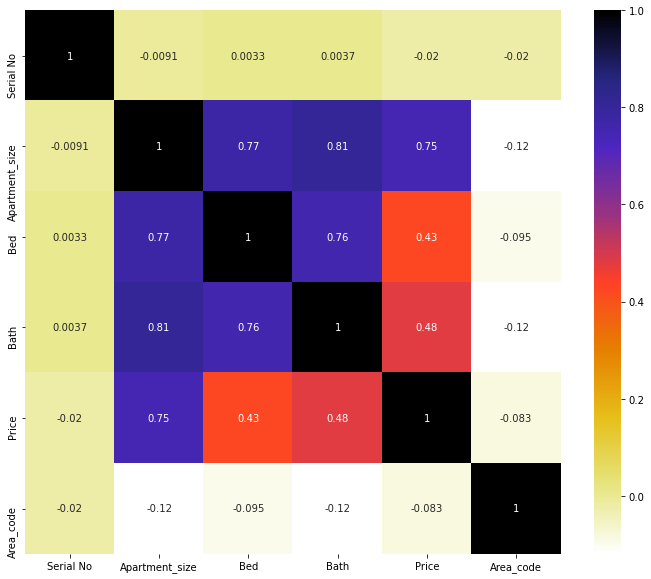

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [22]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = linearRegression.predict(X_test)

In [24]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)
y_logistic_pred = logisticReg.predict(X_test)

C:\Users\maloy\anaconda3\envs\tensor_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
counter = 0

for i, j in zip(y_test, y_logistic_pred):
    print(f"Real Value: {i}, Predicted Value: {j}")
    if i == j:
        counter += 1
print(counter)

Real Value: 23000, Predicted Value: 15000
Real Value: 26000, Predicted Value: 15000
Real Value: 20000, Predicted Value: 15000
Real Value: 14000, Predicted Value: 15000
Real Value: 18000, Predicted Value: 25000
Real Value: 20000, Predicted Value: 15000
Real Value: 25000, Predicted Value: 15000
Real Value: 13000, Predicted Value: 15000
Real Value: 25000, Predicted Value: 15000
Real Value: 11000, Predicted Value: 20000
Real Value: 16000, Predicted Value: 25000
Real Value: 35000, Predicted Value: 40000
Real Value: 11000, Predicted Value: 25000
Real Value: 10000, Predicted Value: 15000
Real Value: 22000, Predicted Value: 20000
Real Value: 16500, Predicted Value: 15000
Real Value: 13000, Predicted Value: 25000
Real Value: 14000, Predicted Value: 20000
Real Value: 20000, Predicted Value: 15000
Real Value: 10000, Predicted Value: 15000
Real Value: 19000, Predicted Value: 15000
Real Value: 60000, Predicted Value: 40000
Real Value: 13500, Predicted Value: 15000
Real Value: 35000, Predicted Value

Real Value: 11000, Predicted Value: 15000
Real Value: 11000, Predicted Value: 15000
Real Value: 12000, Predicted Value: 15000
Real Value: 23000, Predicted Value: 15000
Real Value: 13000, Predicted Value: 20000
Real Value: 12000, Predicted Value: 15000
Real Value: 12000, Predicted Value: 25000
Real Value: 10000, Predicted Value: 15000
Real Value: 21000, Predicted Value: 40000
Real Value: 12000, Predicted Value: 15000
Real Value: 21000, Predicted Value: 25000
Real Value: 14000, Predicted Value: 15000
Real Value: 11000, Predicted Value: 15000
Real Value: 18000, Predicted Value: 15000
Real Value: 12000, Predicted Value: 15000
Real Value: 14000, Predicted Value: 15000
Real Value: 10500, Predicted Value: 15000
Real Value: 12000, Predicted Value: 15000
Real Value: 23000, Predicted Value: 15000
Real Value: 16000, Predicted Value: 15000
Real Value: 20000, Predicted Value: 15000
Real Value: 15000, Predicted Value: 15000
Real Value: 15000, Predicted Value: 15000
Real Value: 26000, Predicted Value

In [17]:
count = 0
for i, j in zip(y_test, y_pred):
    print(f"Real Value: {i}, Predicted Value: {j}")

Real Value: 23000, Predicted Value: 15243.375332225944
Real Value: 26000, Predicted Value: 39705.54122702341
Real Value: 20000, Predicted Value: 16772.419795535865
Real Value: 14000, Predicted Value: 12332.737368050684
Real Value: 18000, Predicted Value: 17128.872419301595
Real Value: 20000, Predicted Value: 12932.817687655743
Real Value: 25000, Predicted Value: 43555.9371876665
Real Value: 13000, Predicted Value: 7172.791164527531
Real Value: 25000, Predicted Value: 14913.156550084597
Real Value: 11000, Predicted Value: 7172.791164527531
Real Value: 16000, Predicted Value: 30381.30914734643
Real Value: 35000, Predicted Value: 51939.391681355955
Real Value: 11000, Predicted Value: 16574.831931929264
Real Value: 10000, Predicted Value: 14947.510369009678
Real Value: 22000, Predicted Value: 25635.987493401695
Real Value: 16500, Predicted Value: 18662.817876659996
Real Value: 13000, Predicted Value: 8683.810675542982
Real Value: 14000, Predicted Value: 7172.791164527531
Real Value: 20000,

Real Value: 20000, Predicted Value: 8946.887193747536
Real Value: 21000, Predicted Value: 23923.498714250847
Real Value: 15000, Predicted Value: 18449.662595216956
Real Value: 10000, Predicted Value: 11108.354341401891
Real Value: 23500, Predicted Value: 28770.001082535608
Real Value: 12000, Predicted Value: 10754.533116773431
Real Value: 10000, Predicted Value: 7172.791164527531
Real Value: 13000, Predicted Value: 15063.812420913811
Real Value: 16000, Predicted Value: 17279.974370403143
Real Value: 18000, Predicted Value: 39604.80659295571
Real Value: 10000, Predicted Value: 11414.885728406109
Real Value: 12000, Predicted Value: 15063.812420913811
Real Value: 10600, Predicted Value: 4542.450745732105
Real Value: 20000, Predicted Value: 36509.92038782034
Real Value: 13000, Predicted Value: 9849.17141555568
Real Value: 11000, Predicted Value: 15063.812420913811
Real Value: 13500, Predicted Value: 15063.812420913811
Real Value: 50000, Predicted Value: 59821.38842714101
Real Value: 14000,

Real Value: 13500, Predicted Value: 4441.716111664407
Real Value: 17000, Predicted Value: 14610.952647881506
Real Value: 19500, Predicted Value: 15063.812420913811
Real Value: 14000, Predicted Value: 34570.12040670493
Real Value: 15000, Predicted Value: 12019.29353281229
Real Value: 40000, Predicted Value: 53825.90835795129
Real Value: 12000, Predicted Value: 11465.253045439957
Real Value: 12500, Predicted Value: 7172.791164527531
Real Value: 28000, Predicted Value: 33527.00874978799
Real Value: 29000, Predicted Value: 17655.47153598303
Real Value: 12000, Predicted Value: 7172.791164527531
Real Value: 10000, Predicted Value: 20216.400095930447
Real Value: 16000, Predicted Value: 17279.974370403143
Real Value: 15000, Predicted Value: 16826.668517098507
Real Value: 28000, Predicted Value: 39705.54122702341
Real Value: 15000, Predicted Value: 18662.817876659996
Real Value: 10000, Predicted Value: 11414.885728406109
Real Value: 27000, Predicted Value: 13402.137039069145
Real Value: 28000, 

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [16]:
rfr = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

In [18]:
y_pred = rfr.predict(X_test)

In [19]:
counter = 0

for i, j in zip(y_test, y_pred):
#     print(f"Real Value: {i}, Predicted value: {int(j)}")
    if i == int(j) or i in list(range(int(j)-2000, int(j)+2000)):
        counter += 1
print(counter)

2409


In [27]:
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_test), y_test, squared=False)

(6618.766013859486, 6460.6031280426605)

In [89]:
mse(gbr.predict(X_test), y_test, squared=False)

6474.745397151625

In [28]:
import pickle

In [29]:
pickle.dump(gbr, open('gbr_new_29thJuly2022.sav', 'wb'))

In [32]:
loaded_model = pickle.load(open('gbr_new_29thJuly2022.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9064113834567326


In [97]:
y_test

19020    23000
26227    26000
12060    20000
22019    14000
27436    18000
         ...  
864      80000
28300    10000
17646    22000
11720    32000
5944     28000
Name: Price, Length: 5758, dtype: int64

In [95]:
loaded_model.predict(y_test)

ValueError: X has 5758 features, but DecisionTreeRegressor is expecting 4 features as input.

In [73]:
counter = 0

for i, j in zip(y_test, y_gbr_pred):
#     print(f"Real Value: {i}, Predicted value: {int(j)}")
    if i == int(j) or i in list(range(int(j)-2000, int(j)+2000)):
        counter += 1
print(counter)

3034


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


simple_nn = Sequential()
simple_nn.add(InputLayer((4,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=200)

Epoch 1/200
720/720 [==============================] - 1s 1ms/step - loss: 840119666.0638 - root_mean_squared_error: 28948.7686 - val_loss: 878022080.0000 - val_root_mean_squared_error: 29631.4375
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 2/200
720/720 [==============================] - 1s 733us/step - loss: 889745406.0472 - root_mean_squared_error: 29809.7298 - val_loss: 875085504.0000 - val_root_mean_squared_error: 29581.8438
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 3/200
720/720 [==============================] - 1s 841us/step - loss: 889339267.5506 - root_mean_squared_error: 29802.0973 - val_loss: 872168000.0000 - val_root_mean_squared_error: 29532.4902
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 4/200
720/720 [==============================] - 1s 779us/step - loss: 921944112.2441 - root_mean_squared_error: 30336.2583 - val_loss: 869259776.0000 - val_root_mean_squared_error: 29483.2109
INFO:tensorflow:Assets writte

INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 33/200
720/720 [==============================] - 1s 696us/step - loss: 816692452.3939 - root_mean_squared_error: 28558.9630 - val_loss: 789461376.0000 - val_root_mean_squared_error: 28097.3555
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 34/200
720/720 [==============================] - 1s 713us/step - loss: 780156815.6227 - root_mean_squared_error: 27906.0780 - val_loss: 786862144.0000 - val_root_mean_squared_error: 28051.0625
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 35/200
720/720 [==============================] - 1s 697us/step - loss: 812653673.6311 - root_mean_squared_error: 28500.9334 - val_loss: 784281856.0000 - val_root_mean_squared_error: 28005.0332
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 36/200
720/720 [==============================] - 1s 714us/step - loss: 837971107.9057 - root_mean_squared_error: 28887.2317 - val_loss: 781706112.0000 - val_

INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 96/200
720/720 [==============================] - 1s 696us/step - loss: 643940598.5687 - root_mean_squared_error: 25341.9957 - val_loss: 645922112.0000 - val_root_mean_squared_error: 25414.9980
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 97/200
720/720 [==============================] - 0s 689us/step - loss: 692825712.1997 - root_mean_squared_error: 26270.2735 - val_loss: 643966016.0000 - val_root_mean_squared_error: 25376.4863
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 98/200
720/720 [==============================] - 1s 697us/step - loss: 633636152.7212 - root_mean_squared_error: 25129.3812 - val_loss: 642023040.0000 - val_root_mean_squared_error: 25338.1738
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 99/200
720/720 [==============================] - 1s 696us/step - loss: 688442267.9834 - root_mean_squared_error: 26199.5633 - val_loss: 640100416.0000 - val_

INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 159/200
720/720 [==============================] - 1s 768us/step - loss: 561340021.8807 - root_mean_squared_error: 23666.7090 - val_loss: 542965312.0000 - val_root_mean_squared_error: 23301.6152
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 160/200
720/720 [==============================] - 1s 739us/step - loss: 633376886.6574 - root_mean_squared_error: 25085.5907 - val_loss: 541659776.0000 - val_root_mean_squared_error: 23273.5859
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 161/200
720/720 [==============================] - 1s 716us/step - loss: 580596341.5479 - root_mean_squared_error: 24049.8003 - val_loss: 540360064.0000 - val_root_mean_squared_error: 23245.6465
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 162/200
720/720 [==============================] - 1s 726us/step - loss: 650823824.2219 - root_mean_squared_error: 25364.4924 - val_loss: 539066240.0000 - 

In [25]:
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_test), y_test, squared=False)


(22813.82214218228, 22303.236377280708)

In [37]:
X_test[0:20]

,Apartment_size,Bed,Bath,Area_code
19020,1135,3,3,451
26227,1600,3,3,578
12060,1000,3,2,478
22019,750,2,2,460
27436,800,2,2,47
27032,650,2,1,511
21224,1700,3,3,605
10423,650,2,2,583
6084,1100,3,3,706
15053,650,2,2,180


In [34]:
X[864:865]

,Apartment_size,Bed,Bath,Area_code
864,1700,3,3,59


In [38]:
gbr.predict([[1600, 3, 3, 578]])

array([27535.04639152])

In [39]:
y_test

19020    23000
26227    26000
12060    20000
22019    14000
27436    18000
         ...  
864      80000
28300    10000
17646    22000
11720    32000
5944     28000
Name: Price, Length: 5758, dtype: int64

In [82]:
medium_nn = Sequential()
medium_nn.add(InputLayer((4,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=200)

Epoch 1/200
720/720 [==============================] - 1s 959us/step - loss: 254887697.8863 - root_mean_squared_error: 15914.1933 - val_loss: 176434400.0000 - val_root_mean_squared_error: 13282.8613
INFO:tensorflow:Assets written to: models\medium_nn\assets
Epoch 2/200
720/720 [==============================] - 1s 802us/step - loss: 223340174.2691 - root_mean_squared_error: 14888.6755 - val_loss: 294279744.0000 - val_root_mean_squared_error: 17154.5840
Epoch 3/200
720/720 [==============================] - 1s 768us/step - loss: 203881730.6519 - root_mean_squared_error: 14243.1150 - val_loss: 238364896.0000 - val_root_mean_squared_error: 15439.0703
Epoch 4/200
720/720 [==============================] - 1s 731us/step - loss: 184846556.8655 - root_mean_squared_error: 13543.4614 - val_loss: 147975376.0000 - val_root_mean_squared_error: 12164.5127
INFO:tensorflow:Assets written to: models\medium_nn\assets
Epoch 5/200
720/720 [==============================] - 1s 786us/step - loss: 209661194

Epoch 81/200
720/720 [==============================] - 1s 760us/step - loss: 176185883.0180 - root_mean_squared_error: 13216.7012 - val_loss: 173234176.0000 - val_root_mean_squared_error: 13161.8457
Epoch 82/200
720/720 [==============================] - 1s 754us/step - loss: 153329767.8225 - root_mean_squared_error: 12342.7729 - val_loss: 198406608.0000 - val_root_mean_squared_error: 14085.6885
Epoch 83/200
720/720 [==============================] - 1s 789us/step - loss: 178844218.9404 - root_mean_squared_error: 13304.5887 - val_loss: 199691568.0000 - val_root_mean_squared_error: 14131.2266
Epoch 84/200
720/720 [==============================] - 1s 740us/step - loss: 200400173.9251 - root_mean_squared_error: 14140.2061 - val_loss: 156574624.0000 - val_root_mean_squared_error: 12512.9785
Epoch 85/200
720/720 [==============================] - 1s 759us/step - loss: 187557124.8877 - root_mean_squared_error: 13640.1458 - val_loss: 182517248.0000 - val_root_mean_squared_error: 13509.8945


Epoch 122/200
720/720 [==============================] - 1s 1ms/step - loss: 172469180.9709 - root_mean_squared_error: 13109.0183 - val_loss: 164935936.0000 - val_root_mean_squared_error: 12842.7383
Epoch 123/200
720/720 [==============================] - 1s 904us/step - loss: 175764186.8849 - root_mean_squared_error: 13232.2781 - val_loss: 154638224.0000 - val_root_mean_squared_error: 12435.3623
Epoch 124/200
720/720 [==============================] - 1s 886us/step - loss: 178282004.2497 - root_mean_squared_error: 13329.3015 - val_loss: 154483808.0000 - val_root_mean_squared_error: 12429.1514
Epoch 125/200
720/720 [==============================] - 1s 790us/step - loss: 158917576.7490 - root_mean_squared_error: 12501.9232 - val_loss: 154246528.0000 - val_root_mean_squared_error: 12419.6025
Epoch 126/200
720/720 [==============================] - 1s 760us/step - loss: 206484679.1567 - root_mean_squared_error: 14322.6587 - val_loss: 168696272.0000 - val_root_mean_squared_error: 12988.31

Epoch 163/200
720/720 [==============================] - 1s 744us/step - loss: 177062374.8710 - root_mean_squared_error: 13273.6332 - val_loss: 169291728.0000 - val_root_mean_squared_error: 13011.2158
Epoch 164/200
720/720 [==============================] - 1s 740us/step - loss: 162729637.5146 - root_mean_squared_error: 12717.8257 - val_loss: 152631984.0000 - val_root_mean_squared_error: 12354.4316
Epoch 165/200
720/720 [==============================] - 1s 748us/step - loss: 185856722.5243 - root_mean_squared_error: 13571.7849 - val_loss: 159214096.0000 - val_root_mean_squared_error: 12618.0068
Epoch 166/200
720/720 [==============================] - 1s 743us/step - loss: 232766465.8308 - root_mean_squared_error: 14948.1226 - val_loss: 155576576.0000 - val_root_mean_squared_error: 12473.0342
Epoch 167/200
720/720 [==============================] - 1s 741us/step - loss: 181000898.6491 - root_mean_squared_error: 13407.6541 - val_loss: 163731168.0000 - val_root_mean_squared_error: 12795.

In [84]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_test), y_test, squared=False)

(10757.652194814213, 9470.974371830835)

In [86]:
large_nn = Sequential()
large_nn.add(InputLayer((4,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=200)

Epoch 1/200
720/720 [==============================] - 1s 1ms/step - loss: 325389478.7462 - root_mean_squared_error: 17852.6607 - val_loss: 569995904.0000 - val_root_mean_squared_error: 23874.5879
INFO:tensorflow:Assets written to: models\large_nn\assets
Epoch 2/200
720/720 [==============================] - 1s 1ms/step - loss: 284219321.5867 - root_mean_squared_error: 16801.8038 - val_loss: 248964960.0000 - val_root_mean_squared_error: 15778.6230
INFO:tensorflow:Assets written to: models\large_nn\assets
Epoch 3/200
720/720 [==============================] - 1s 1ms/step - loss: 225062662.0472 - root_mean_squared_error: 14962.0595 - val_loss: 297440864.0000 - val_root_mean_squared_error: 17246.4746
Epoch 4/200
720/720 [==============================] - 1s 992us/step - loss: 200407507.4951 - root_mean_squared_error: 14134.5473 - val_loss: 245727680.0000 - val_root_mean_squared_error: 15675.7031
INFO:tensorflow:Assets written to: models\large_nn\assets
Epoch 5/200
720/720 [===============

720/720 [==============================] - 1s 986us/step - loss: 427933992.8655 - root_mean_squared_error: 20609.6984 - val_loss: 447053600.0000 - val_root_mean_squared_error: 21143.6426
Epoch 82/200
720/720 [==============================] - 1s 932us/step - loss: 454137841.4424 - root_mean_squared_error: 21295.8233 - val_loss: 446209056.0000 - val_root_mean_squared_error: 21123.6602
Epoch 83/200
720/720 [==============================] - 1s 976us/step - loss: 461935738.0416 - root_mean_squared_error: 21466.1689 - val_loss: 447344288.0000 - val_root_mean_squared_error: 21150.5156
Epoch 84/200
720/720 [==============================] - 1s 1ms/step - loss: 442620314.7184 - root_mean_squared_error: 20992.1195 - val_loss: 446687488.0000 - val_root_mean_squared_error: 21134.9824
Epoch 85/200
720/720 [==============================] - 1s 965us/step - loss: 421237449.4757 - root_mean_squared_error: 20487.9651 - val_loss: 447110400.0000 - val_root_mean_squared_error: 21144.9844
Epoch 86/200
72

720/720 [==============================] - 1s 1ms/step - loss: 592403827.5728 - root_mean_squared_error: 23887.6269 - val_loss: 446037152.0000 - val_root_mean_squared_error: 21119.5918
Epoch 164/200
720/720 [==============================] - 1s 1ms/step - loss: 464967214.1137 - root_mean_squared_error: 21548.1423 - val_loss: 446040192.0000 - val_root_mean_squared_error: 21119.6641
Epoch 165/200
720/720 [==============================] - 1s 1ms/step - loss: 472310005.1928 - root_mean_squared_error: 21683.3452 - val_loss: 446646400.0000 - val_root_mean_squared_error: 21134.0098
Epoch 166/200
720/720 [==============================] - 1s 1ms/step - loss: 520668559.6671 - root_mean_squared_error: 22781.8275 - val_loss: 445988256.0000 - val_root_mean_squared_error: 21118.4336
Epoch 167/200
720/720 [==============================] - 1s 1ms/step - loss: 445615696.5992 - root_mean_squared_error: 21088.7521 - val_loss: 446429056.0000 - val_root_mean_squared_error: 21128.8672
Epoch 168/200
720/7

In [87]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_test), y_test, squared=False)

(13284.734545462214, 12489.698438497617)